In [40]:
#Fibbonaci dengan while
nterms = int(input("How many terms? "))
n1, n2 = 0, 1
count = 0
if nterms <= 0:
  print("Please enter a positive integer")
elif nterms == 1:
  print("Fibonacci sequence upto ",nterms,":")
  print(n1)
else:
  print("Fibonacci sequence:")
  while count <nterms:
    print(n1)
    nth = n1+n2
    #update nilai
    n1 = n2
    n2 = nth
    count += 1

How many terms? 10
Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34


In [41]:
# Fibonacci dengan rekursi

def recur_fibo(n):
  if n <= 1:
    return n
  else:
    return(recur_fibo(n-1) + recur_fibo(n-2))

# Memakai input
nterms = int(input("How many terms? "))

# Cek nilai nterms
if nterms <= 0:
  print("Please enter a positive integer")
else:
  print("Fibonacci sequence: ")
  for i in range(nterms):
    print(recur_fibo(i))

How many terms? 10
Fibonacci sequence: 
0
1
1
2
3
5
8
13
21
34


In [42]:
# The Travelling Salesperson Problem
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [43]:
#Try All Tours (exact_TSP)
def exact_TSP(cities):
  "Generate all possible tours of the cities and choose the shortest one."
  return shortest (alltours (cities))
def shortest (tours):
  "Return the tour with the minimum total distance."
  return min (tours, key=total_distance)

In [44]:
#Representing Tours
alltours = itertools.permutations # The permutation function is already defined in the itertools module
cities = {1, 2, 3}
list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [45]:
#Representing Cities and Distance
def total_distance(tour):
  "The total distance between each pair of consecutive cities in the tour."
  return sum(distance (tour[i], tour[i-1]) for i in range(len(tour)))

In [46]:
City = complex # Constructor for new cities, e.g. City (300, 400)
def distance (A, B):
  "The distance between two points."
  return abs (A - B)

In [47]:
A = City(300, 0)
B = City(0, 400)
distance(A,B)

500.0

In [48]:
def Cities(n):
  "Make a set of n cities, each with random coordinates."
  return set (City (random.randrange (10, 890), random.randrange (10, 590)) for c in range(n))
# Let's make some standard sets of cities of various sizes.
# We'll set the random seed so that these sets are the same every time we run this notebook.
random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities (8), Cities(10), Cities (100), Cities(1000)
cities8

{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [49]:
# Apply the exact TSP function to find the minimal tour

tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j))
1990.388372313552


In [50]:
# Try All Non-Redundant Tours
def alltours(cities):
  "Return a list of tours, each a permutation of cities, but each one starting with the same city."
  start = first(cities)
  return [[start] + list(tour)
  for tour in itertools.permutations(cities - {start})]

def first(collection):
  "Start iterating over collection, and return the first element."
  for x in collection:
    return x

In [51]:
# We can verify that for 3 cities there are now 2 tours (not 6) and for 4 cities there are 6 tours (not 24).

alltours({1, 2, 3})

alltours({1,2,3,4})

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2]]

In [52]:
# We can also verify that calling exact_TSP(cities8) still works and gives the same tour with the same total distance.
# (But it is now about 8 times faster.)
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


8 city tour; total distance = 1990.4; time = 0.024 secs for exact_TSP


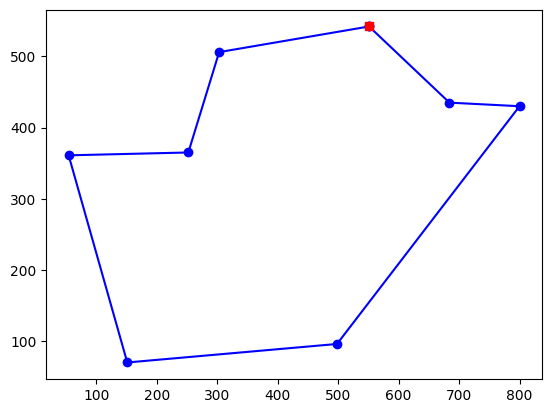

In [53]:
# Plotting
def plot_tour(algorithm, cities):
  "Apply a TSP algorithm to cities, and plot the resulting tour."
  # Find the solution and time long it takes
  t0 = time.time()
  tour = algorithm(cities)
  t1 = time.time()
  # Plot the tour as blue lines between blue circles, and the starting city as a red square.
  plotline(list(tour) + [tour[0]])
  plotline([tour[0]], 'rs')
  plt.show
  print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
      len(tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style = 'bo-'):
  "Plot a list of points (complex numbers) in the 2-D plane."
  X, Y = XY(points)
  plt.plot(X, Y, style)

def XY(points):
  "Given a list of points, return two lists: X coordinates, and Y coordinates."
  return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

9 city tour; total distance = 1524.5; time = 0.146 secs for exact_TSP
9 city tour; total distance = 1554.1; time = 0.000 secs for greedy_TSP
100 city tour; total distance = 6987.7; time = 0.001 secs for greedy_TSP
1000 city tour; total distance = 20529.4; time = 0.142 secs for greedy_TSP


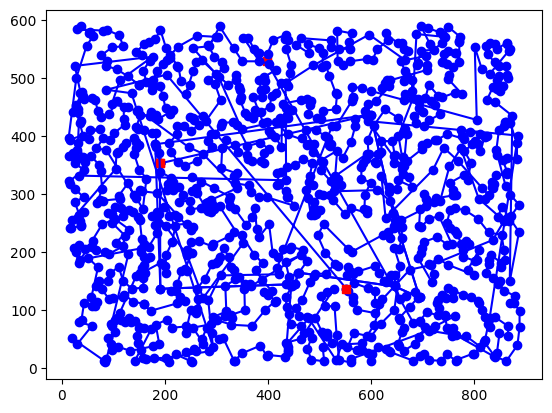

In [54]:
#Greedy Nearest Neighbor (greedy_TSP)
def greedy_TSP(cities):
  "At each step, visit the nearest neighbor that is still unvisited"
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  "Find the city in cities that is nearest to city A."
  return min(cities, key = lambda x: distance(x, A))

cities = Cities(9)
plot_tour(exact_TSP, cities)

plot_tour(greedy_TSP, cities)

plot_tour(greedy_TSP, cities100)

plot_tour(greedy_TSP, cities1000)

9 city tour; total distance = 1816.9; time = 0.235 secs for exact_TSP
9 city tour; total distance = 2397.4; time = 0.000 secs for greedy_TSP
100 city tour; total distance = 6987.7; time = 0.001 secs for greedy_TSP
1000 city tour; total distance = 20529.4; time = 0.151 secs for greedy_TSP


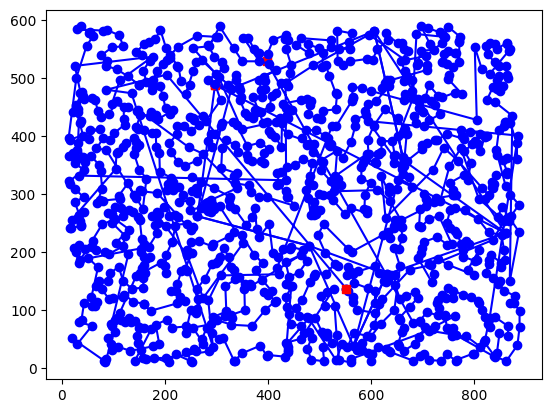

In [55]:
# Greedy Nearest Neighbor (greedy_TSP)
def greedy_TSP(cities):
  "At each step, visit the nearest neighbor that is still unvisited"
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  "Find the city in cities that is nearest to city A."
  return min(cities, key = lambda x: distance(x, A))

cities = Cities(9)
plot_tour(exact_TSP, cities)

plot_tour(greedy_TSP, cities)

plot_tour(greedy_TSP, cities100)

plot_tour(greedy_TSP, cities1000)

In [56]:
#Algorithm 3: Greedy Nearest Neighbor from All Starting Points (all_greedy_TSP)
def allgreedy_TSP(cities):
  "Try the greedy algorithm from each of the starting cities; return the shortest tour."
  return shortest (greedy_TSP (cities, start=c) for c in cities)
# We will modify greedy_TSP to take an optional start city; otherwise it is unchanged.
def greedy_TSP(cities, start=None):
  "At each step, visit the nearest neighbor that is still unvisited."
  if start is None: start = first (cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

100 city tour; total distance = 6987.7; time = 0.002 secs for greedy_TSP


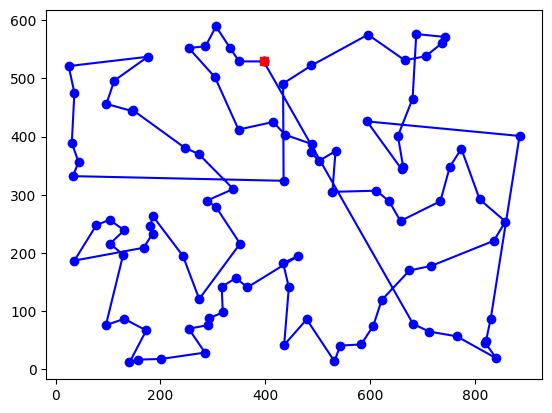

In [57]:
plot_tour(greedy_TSP, cities100)

100 city tour; total distance = 6213.5; time = 0.155 secs for allgreedy_TSP


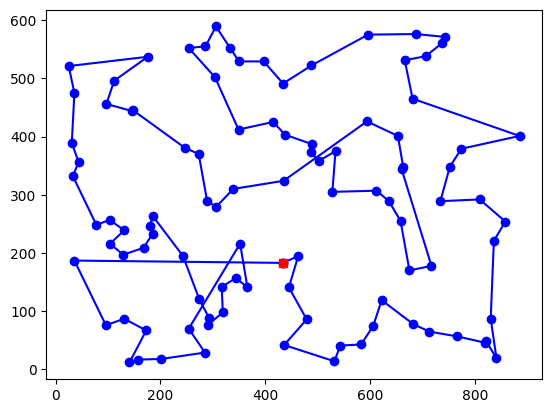

In [58]:
plot_tour(allgreedy_TSP, cities100)

In [59]:
#Algorithm 4: Greedy Nearest Neighbor with Exact End (greedy_exact_end_TSP)
def greedy_exact_end_TSP (cities, start=None, end_size=8):
# """At each step, visit the nearest neighbor that is still unvisited until there are k_end cities left; then choose the best of all possible endings."""
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  # Use greedy algorithm for all but the last end_size cities
  while len(unvisited) > end_size:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  # Consider all permutations of possible ends to the tour, and choose the best one.
  # (But to make things faster, omit the middle of the tour.)
  ends = map(list, itertools.permutations (unvisited))
  best = shortest([tour[0], tour[-1]] + end for end in ends)
  return tour + best [2:]

100 city tour; total distance = 6987.7; time = 0.185 secs for greedy_exact_end_TSP


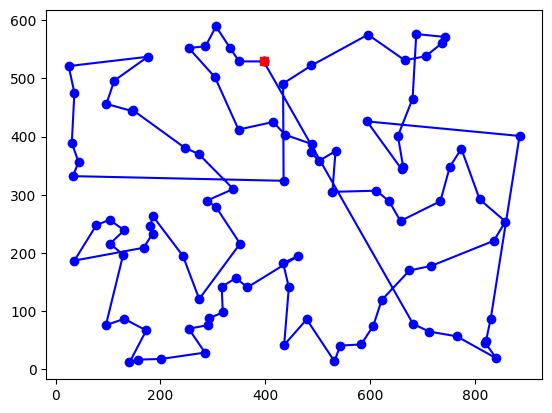

In [60]:
plot_tour(greedy_exact_end_TSP, cities100)

1000 city tour; total distance = 20171.0; time = 0.293 secs for greedy_exact_end_TSP


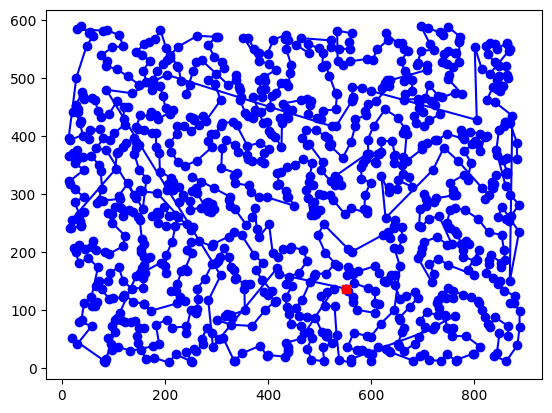

In [61]:
plot_tour(greedy_exact_end_TSP, cities1000)

In [62]:
#Algorithm 5: Greedy Nearest Neighbor with Both Ends Search (greedy_bi_TSP)
def greedy_bi_TSP(cities, start_size=12, end_size=6):
#At each step, visit the nearest neighbor that is still unvisited."
  starts = random.sample(cities, min(len(cities), start_size))
  return shortest(greedy_exact_end_TSP(cities, start, end_size)
    for start in starts)

<ipython-input-62-ef1d1cd059a8>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


100 city tour; total distance = 6230.0; time = 0.057 secs for greedy_bi_TSP


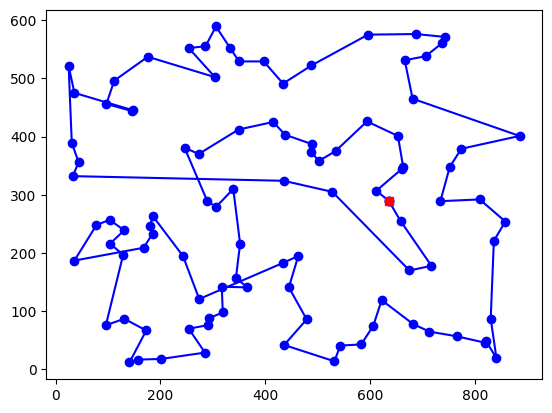

In [63]:
random.seed('bi')
plot_tour(greedy_bi_TSP, cities100)

<ipython-input-62-ef1d1cd059a8>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


1000 city tour; total distance = 19981.9; time = 1.655 secs for greedy_bi_TSP


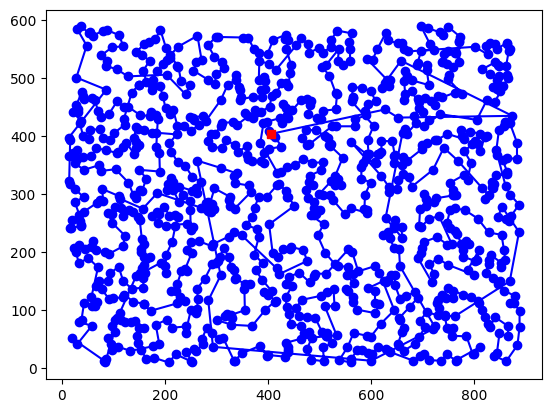

In [64]:
random.seed('bi')
plot_tour(greedy_bi_TSP, cities1000)

In [65]:
# Slide 51
# Benchmarking Algorithms
def compare_algorithms(algorithms, maps):
  "Apply each algorithm to each map and plot results."
  for algorithm in algorithms:
    t0 = time.time()
    results = [total_distance(algorithm(m)) for m in maps]
    t1 = time.time()
    avg = sum(results) / len(results)
    label = '{:.0f}; {:.1f}s: {}'.format(avg, t1-t0, algorithm._name_)
    plt.plot(sorted(results), label=label)
  plt.legend(loc=2)
  plt.show()
  print('{} x {}-city maps'.format(len(maps), len(maps[0])))

def Maps(M, N):
  "Return a list of M maps, each consisting of a set of N cities."
  return [Cities(N) for m in range(M)]

In [ ]:
compare_algorithms(["greedy_TSP", "greedy_exact_end_TSP", "allgreedy_TSP"], Maps(100, 50))

In [70]:
#Slide 53
def bi_10_6(cities): return greedy_bi_TSP(cities, 10, 6)
def bi_20_5(cities): return greedy_bi_TSP (cities, 20, 5)
def bi_40_4(cities): return greedy_bi_TSP (cities, 40, 4)
def bi_80_2(cities): return greedy_bi_TSP (cities, 80, 2)
def bi_160_1(cities): return greedy_bi_TSP(cities, 160, 1)

algorithms = [bi_10_6, bi_20_5, bi_40_4, bi_80_2, bi_160_1]

In [ ]:
compare_algorithms(algorithms, Maps(100, 50))

In [ ]:
compare_algorithms(algorithms, Maps(25, 160))

In [72]:
string = 'BCAADDDCCACACAC'
# Creating tree nodes
class NodeTree(object):
  def __init__(self, left=None, right=None):
    self.left = left
    self.right = right
  def children(self):
    return (self.left, self.right)
  def nodes (self):
    return (self.left, self.right)
  def _str___(self):
    return '%s_%s' % (self.left, self.right)

In [76]:
# Main function implementing huffman coding
def huffman_code_tree (node, left=True, binString=''):
  if type(node) is str:
    return {node: binString}
  (l, r) = node.children()
  d = dict()
  d.update(huffman_code_tree (1, True, binString + '0'))
  d.update(huffman_code_tree (r, False, binString + '1'))
  return d

In [ ]:
#Slide 59
# Calculating frequency
freq = {}
for c in string:
  if c in freq:
    freq[c] += 1
  else:
    freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

nodes = freq

while len(nodes) > 1:
  (key1, c1) = nodes[-1]
  (key2, c2) = nodes[-2]
  nodes = nodes[:-2]
  node = NodeTree(key1, key2)
  nodes.append((node, c1 + c2))

  nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffman_code_tree(nodes[0][0])

print(' Char | Huffman code ')
print('----------------------')
for (char, frequency) in freq:
  print(' %-4r | %12s' % (char, huffmanCode[char]))